**Imports and Settings**

In [50]:
# Import stuff
import os
from os import walk
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
import glob
import seaborn as sns; sns.set()
from numpy import inf
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import seaborn as sns
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from tqdm.notebook import tqdm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set matplotlib backend, this will make plots interactive
%matplotlib notebook

**Load file names**

In [44]:
# Load file names from your desired directory
files = []
for entry in tqdm(glob.glob("good_epochs/*.csv")):
    files.append(entry)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<?, ?it/s]


**Functions to reject and resample**

In [49]:
def reject(df, threshold):
    '''
    System noise rejection, rejecting signals higher/lower than threshold number of standard deviations.
    Returns df where outliers have been rejected.
    '''
    #rej_indices = []
  
    channels = ['ch1','ch2','ch3', 'ch4']
    for c in channels:
        locut = df[c].mean()-df[c].std()*threshold
        hicut = df[c].mean()+df[c].std()*threshold
        c_array = np.array(df[c].values.tolist())
        #print(c, locut, hicut)

        df[c] = np.where((c_array<hicut) & (c_array>locut), c_array, np.nan)
        #ind = df[(df[c]>hicut) | (df[c]<locut)].index.to_numpy()

        #rej_indices.extend(ind)
    #print(rej_indices)
    #df_rej = df.drop(list(set(rej_indices)))
    #print(df)
    return df

In [73]:
# reject outliers and interpolate
lengths = []
proper_length = []
rej_lens = []
for f in tqdm(files):
    df = pd.read_csv(f)
    #print(df)
    length = len(df)
    lengths.append(length)
    df_rej = reject(df, threshold = 5)
    # Interpolate missing samples
    df_int = df_rej[['ch1', 'ch2', 'ch3', 'ch4']]
    #print(df_int.head(3))
    df_int = df_int.interpolate(method = 'spline', order = 3, axis = 0)
    
    # Drop row if data column is nan
    df_int = df_int.dropna()
    
    df_int.to_csv('notresamp\\'+f[12:])

KeyboardInterrupt: 

notresamp\OpenBCI-RAW-2019-06-20_16-06-23_ec.csv


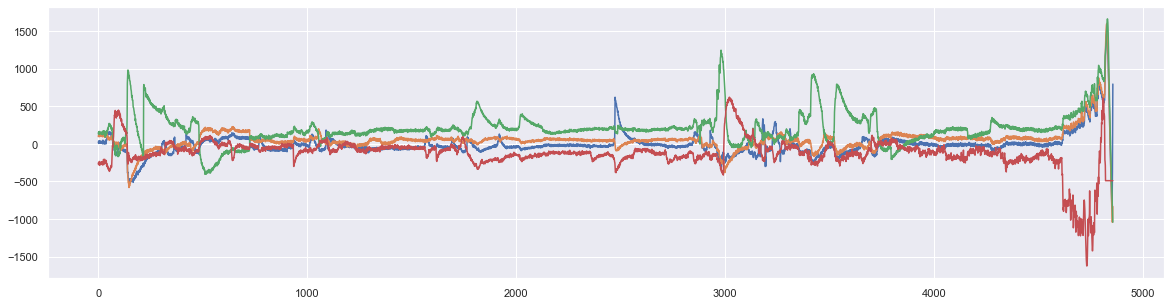

notresamp\OpenBCI-RAW-2019-06-20_16-06-23_eo.csv


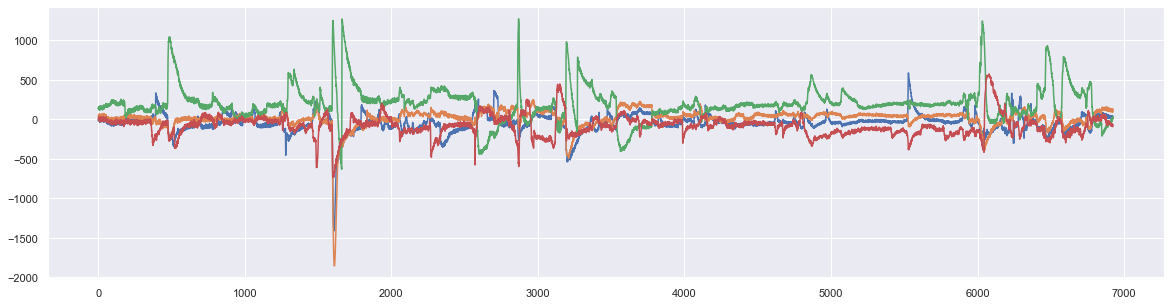

notresamp\OpenBCI-RAW-2019-06-21_15-48-38_ec.csv


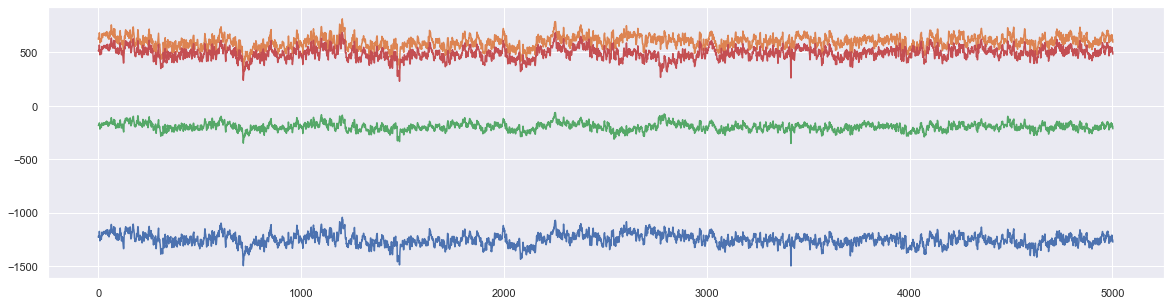

notresamp\OpenBCI-RAW-2019-06-21_15-48-38_eo.csv


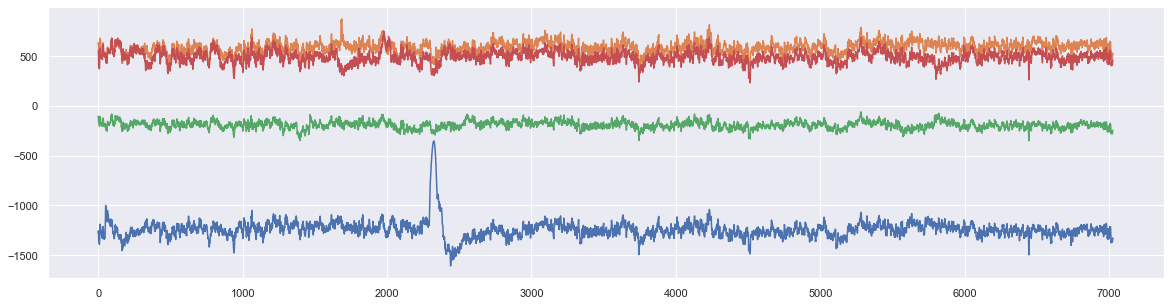

notresamp\OpenBCI-RAW-2019-06-24_12-31-44_ec.csv


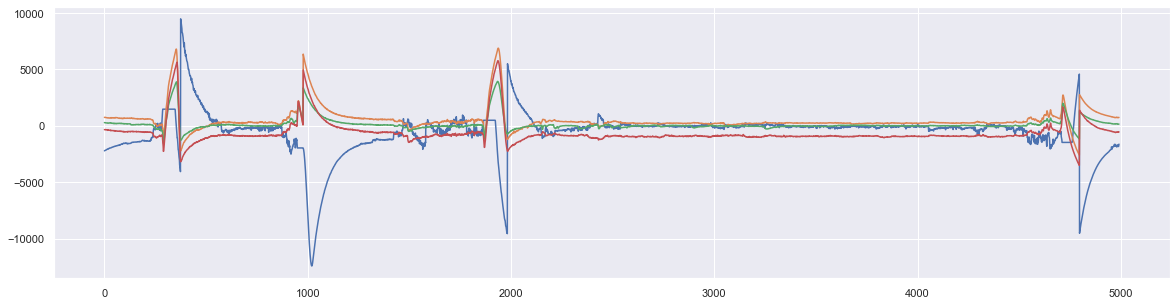

notresamp\OpenBCI-RAW-2019-06-24_12-31-44_eo.csv


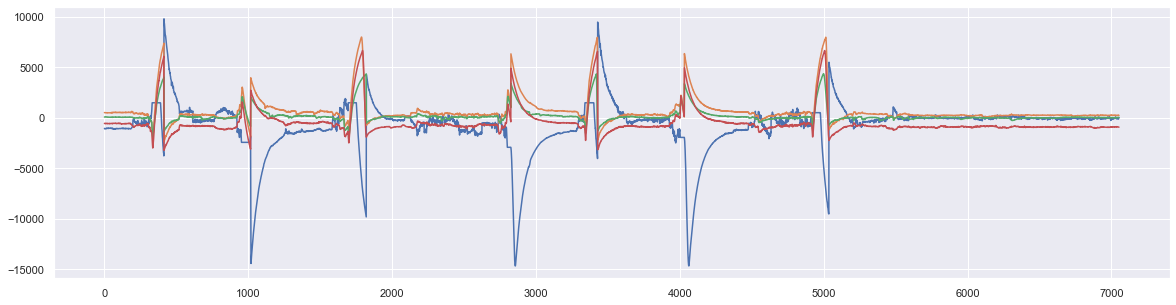

notresamp\OpenBCI-RAW-2019-06-25_15-35-22_ec.csv


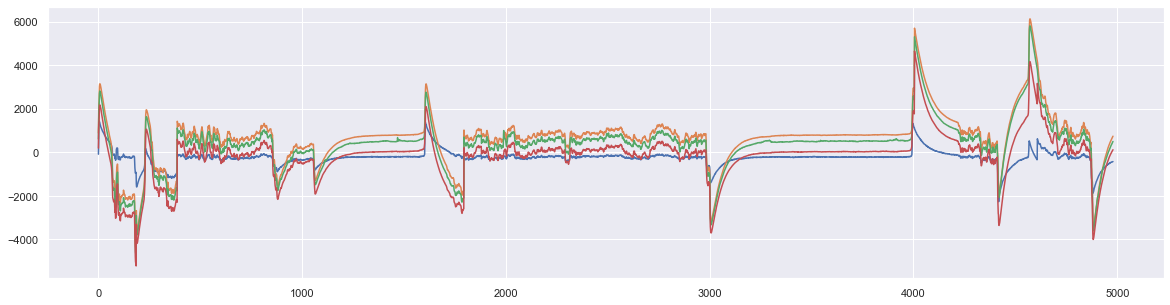

notresamp\OpenBCI-RAW-2019-06-25_15-35-22_eo.csv


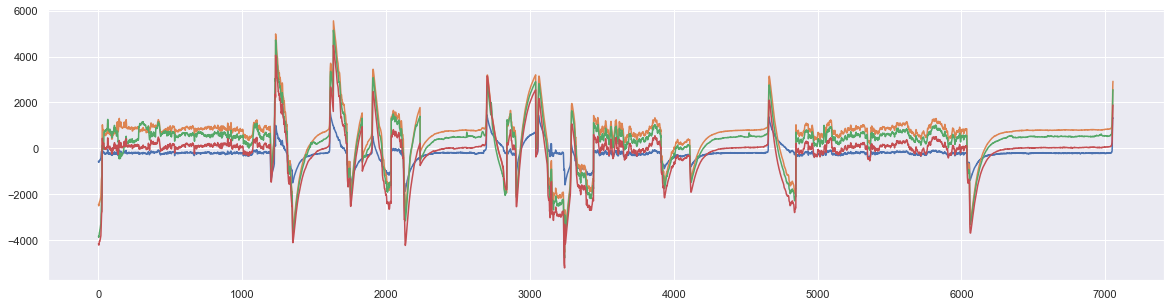

notresamp\OpenBCI-RAW-2019-06-25_16-40-28_ec.csv


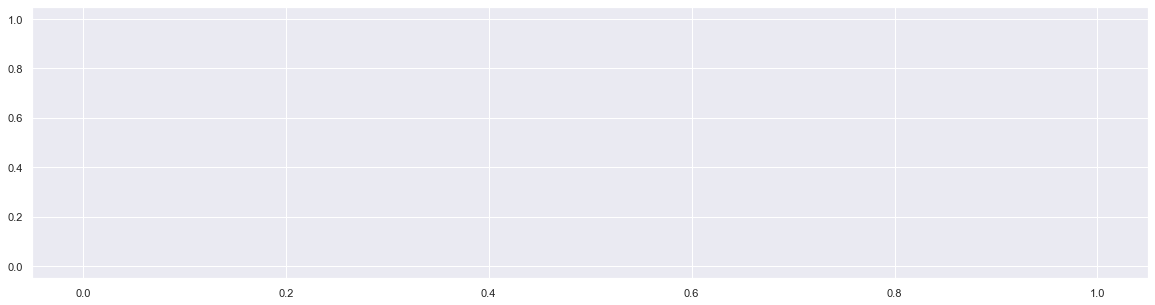

notresamp\OpenBCI-RAW-2019-06-25_16-40-28_eo.csv


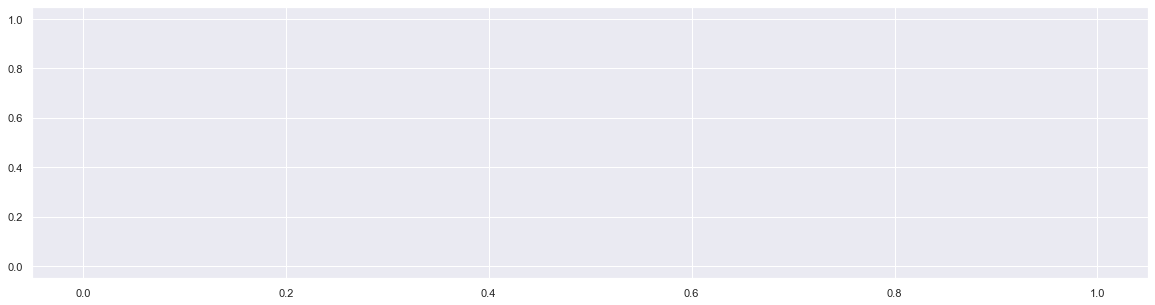

notresamp\OpenBCI-RAW-2019-06-26_10-32-20_ec.csv


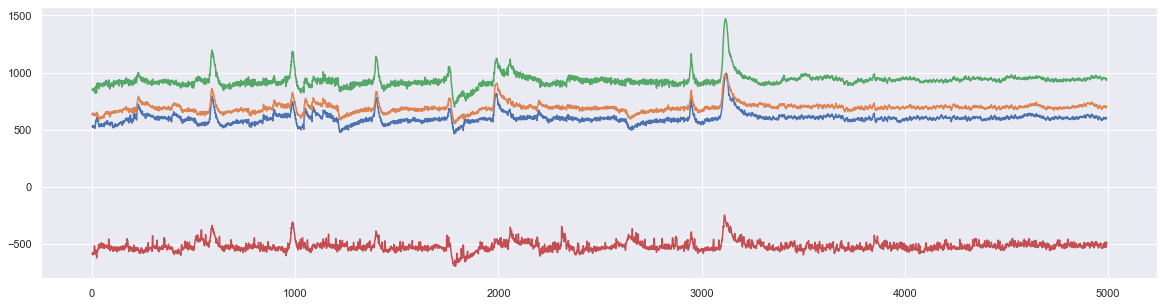

notresamp\OpenBCI-RAW-2019-06-26_10-32-20_eo.csv


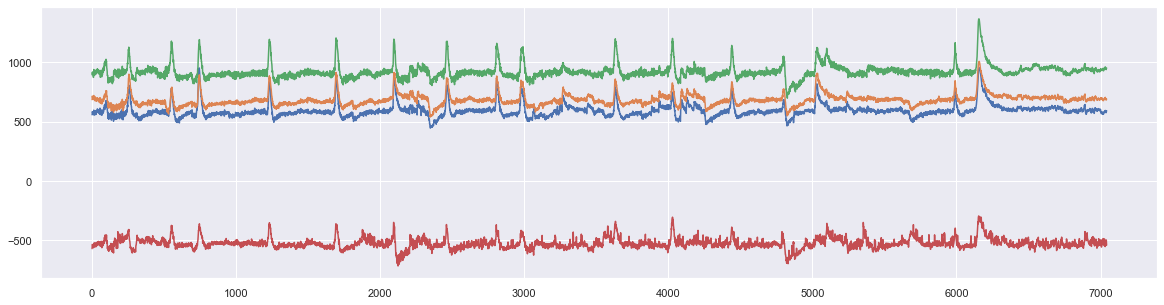

notresamp\OpenBCI-RAW-2019-06-26_12-20-28_ec.csv


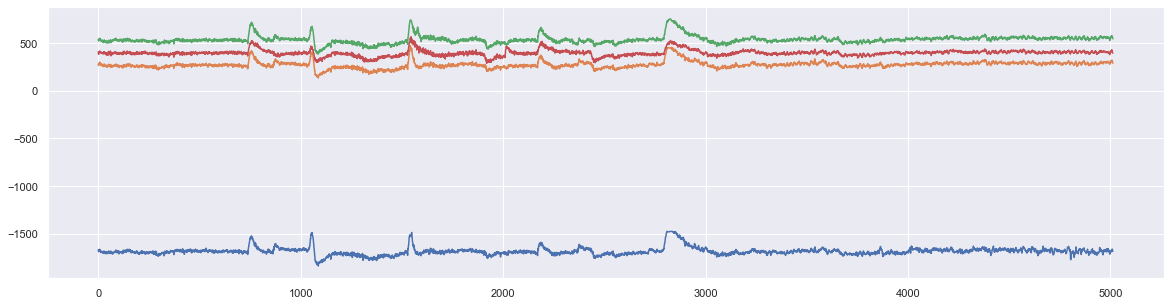

notresamp\OpenBCI-RAW-2019-06-26_12-20-28_eo.csv


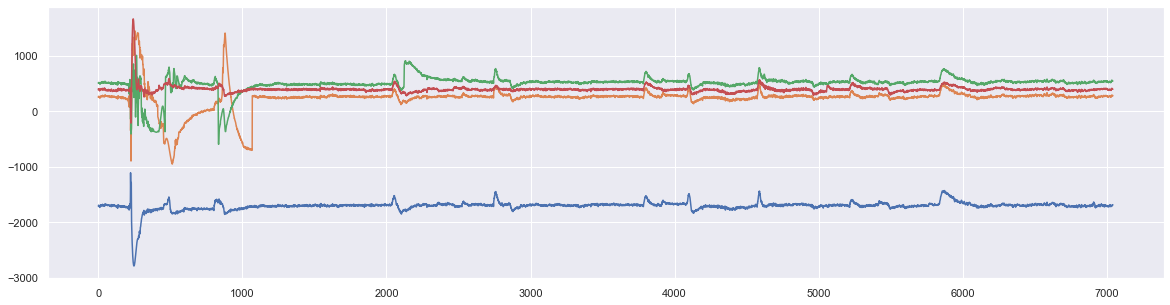

notresamp\OpenBCI-RAW-2019-06-27_10-36-31_ec.csv


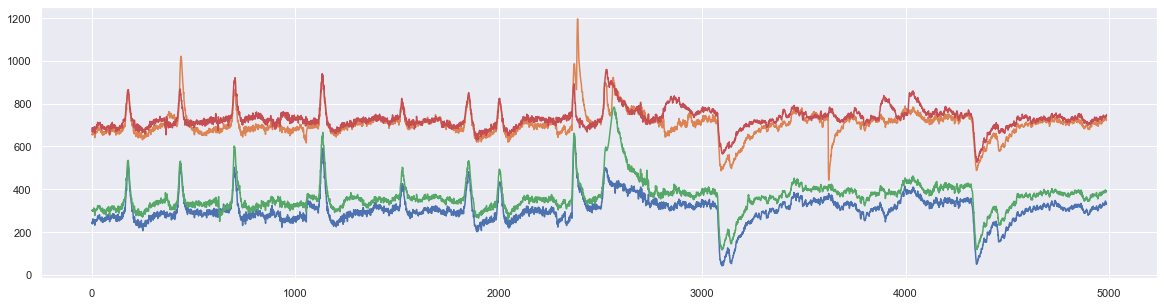

notresamp\OpenBCI-RAW-2019-06-27_10-36-31_eo.csv


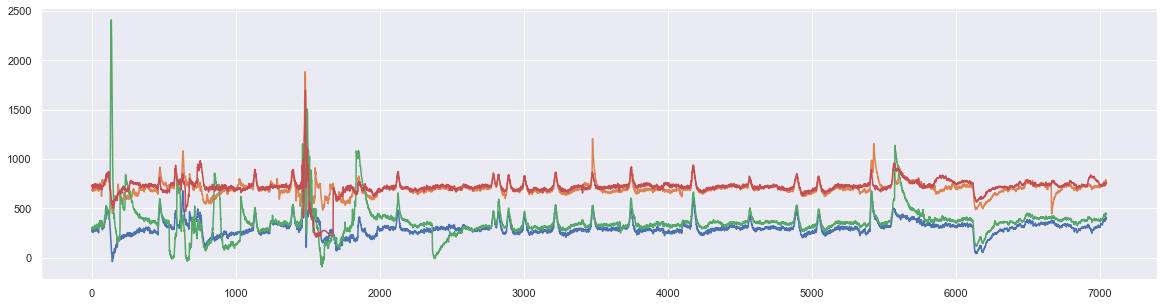

notresamp\OpenBCI-RAW-2019-06-27_11-31-16_ec.csv


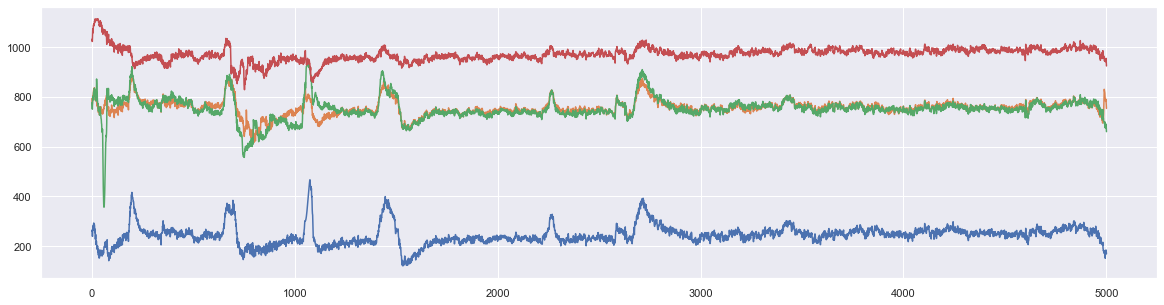

notresamp\OpenBCI-RAW-2019-06-27_11-31-16_eo.csv


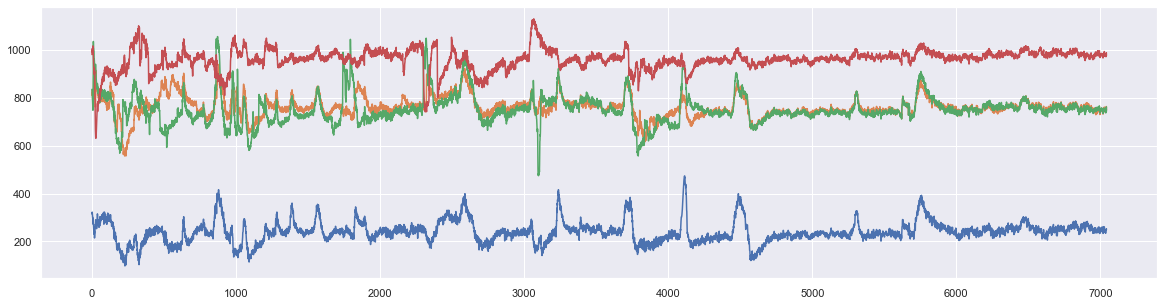

notresamp\OpenBCI-RAW-2019-06-27_12-37-11_ec.csv


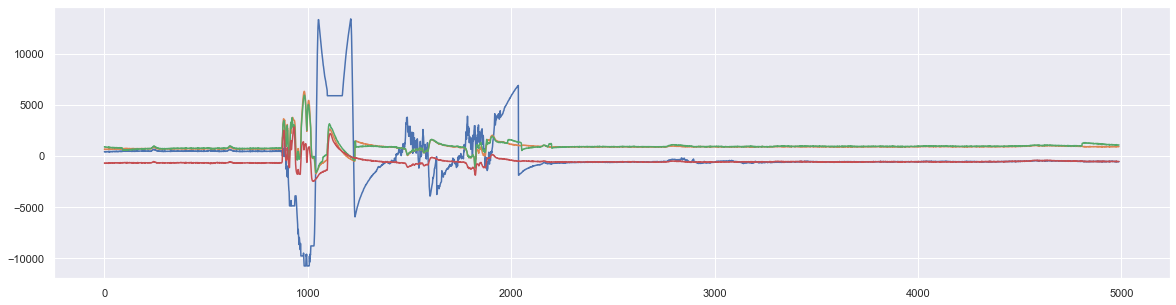

notresamp\OpenBCI-RAW-2019-06-27_12-37-11_eo.csv


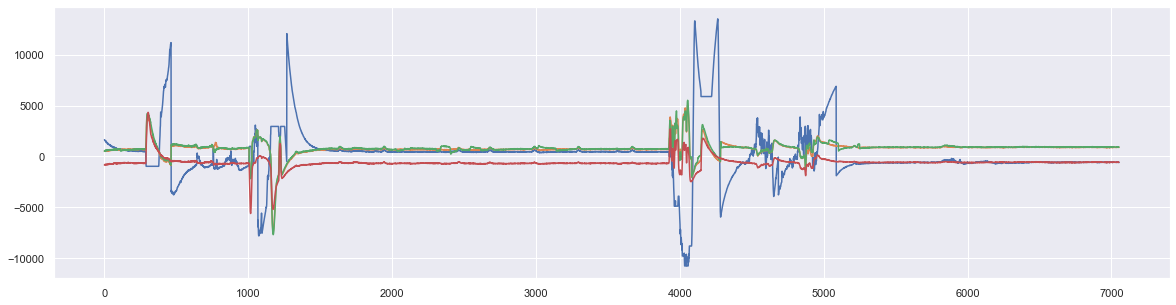

notresamp\OpenBCI-RAW-2019-06-28_10-01-56_ec.csv


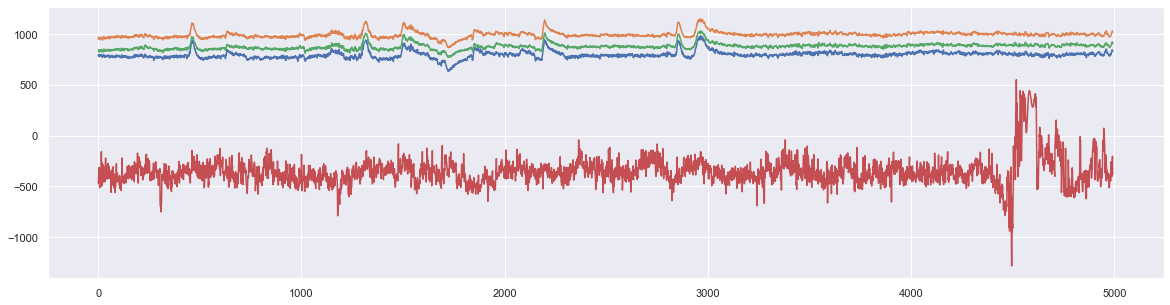

notresamp\OpenBCI-RAW-2019-06-28_10-01-56_eo.csv


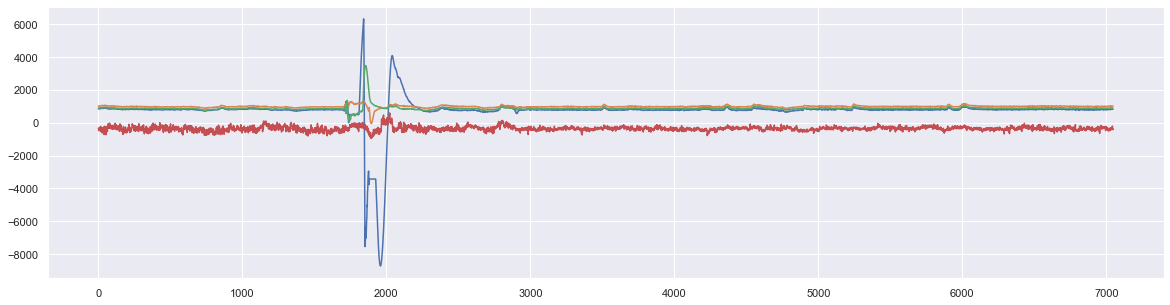

notresamp\OpenBCI-RAW-2019-06-28_10-40-45_ec.csv


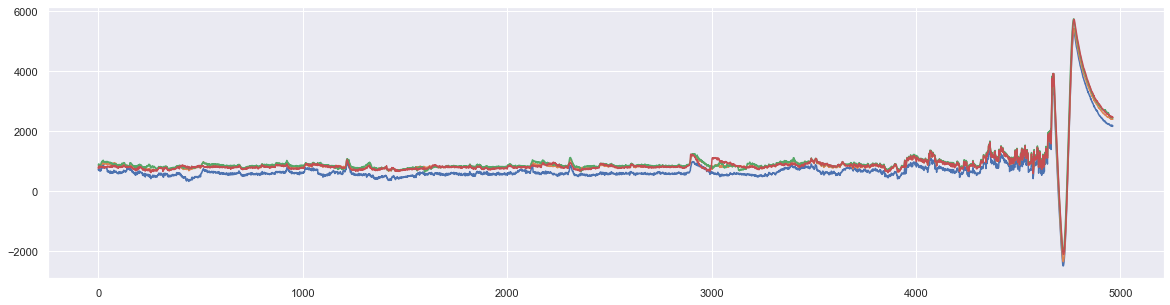

notresamp\OpenBCI-RAW-2019-06-28_10-40-45_eo.csv


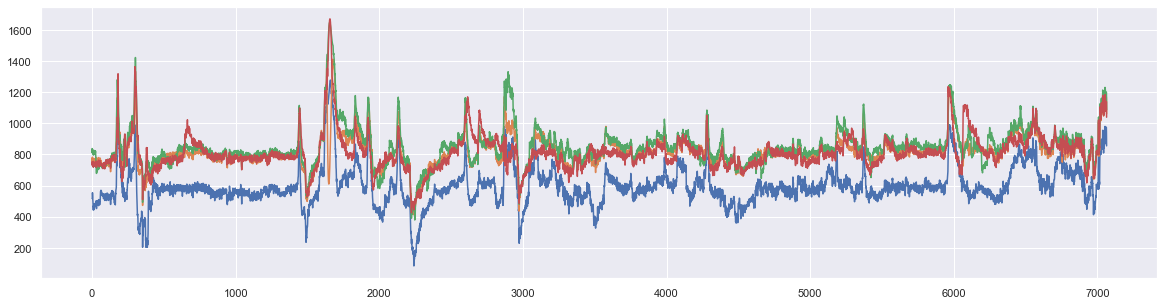

notresamp\OpenBCI-RAW-2019-06-28_12-02-45_ec.csv


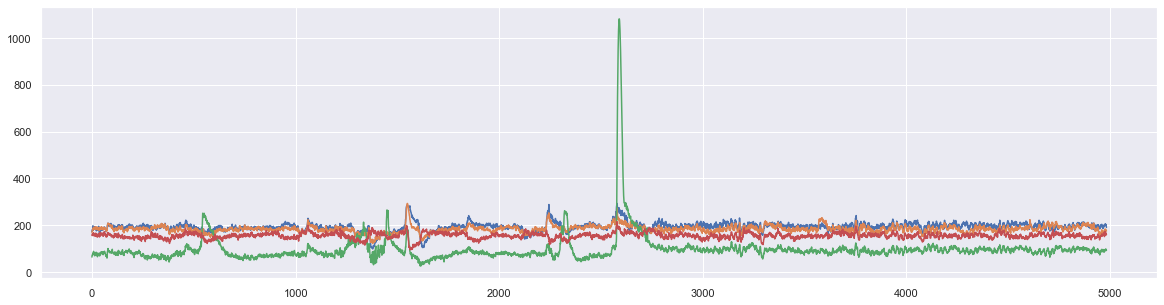

notresamp\OpenBCI-RAW-2019-06-28_12-02-45_eo.csv


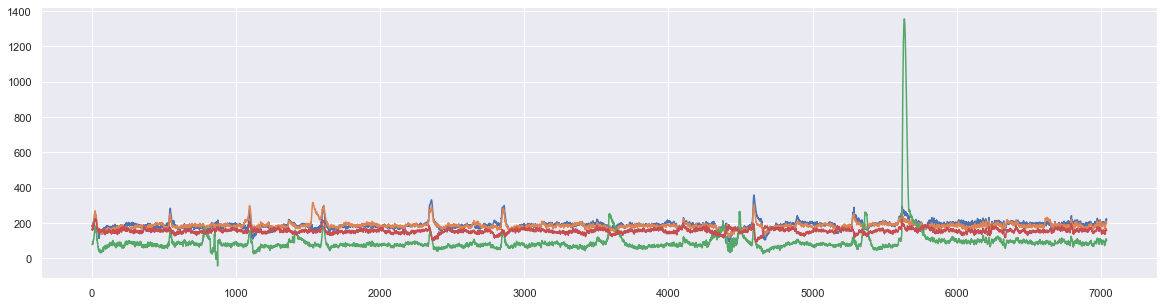

notresamp\OpenBCI-RAW-2019-07-01_10-19-46_eo.csv


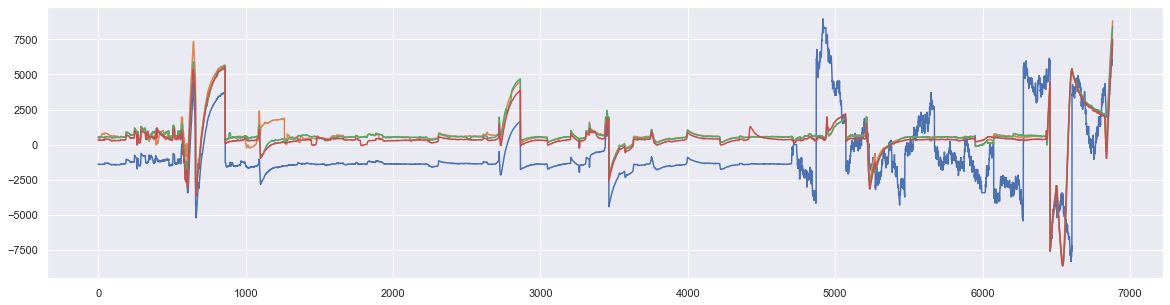

notresamp\OpenBCI-RAW-2019-07-01_12-47-43_ec.csv


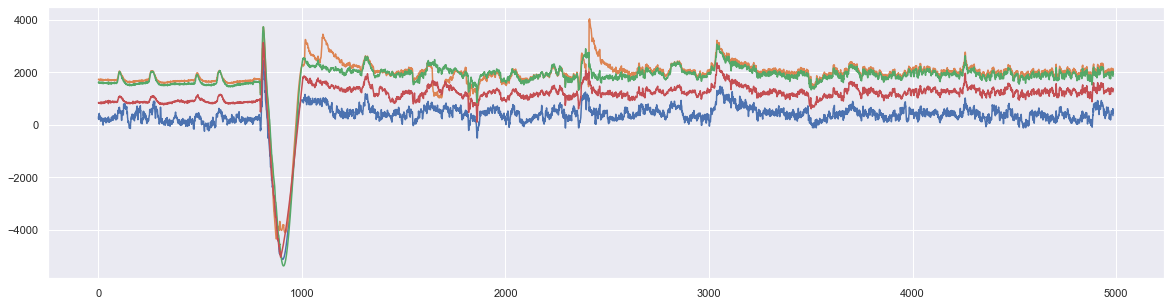

notresamp\OpenBCI-RAW-2019-07-01_12-47-43_eo.csv


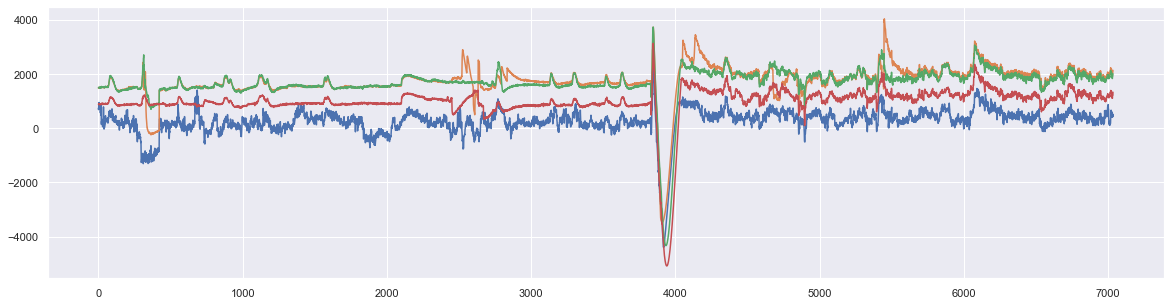

notresamp\OpenBCI-RAW-2019-07-01_15-48-56_ec.csv


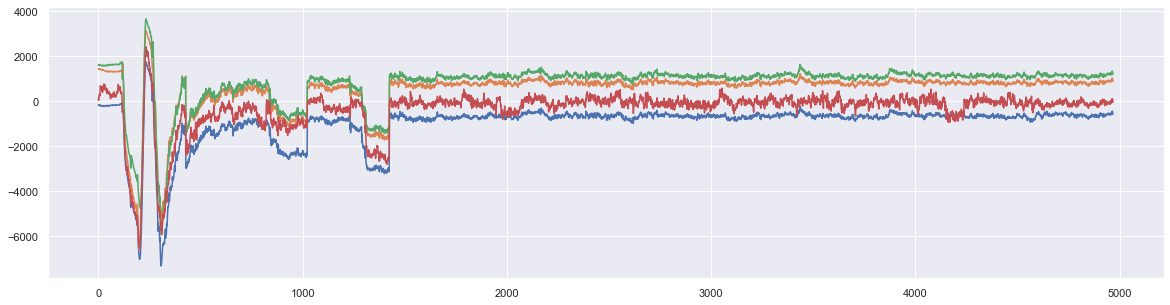

notresamp\OpenBCI-RAW-2019-07-01_15-48-56_eo.csv


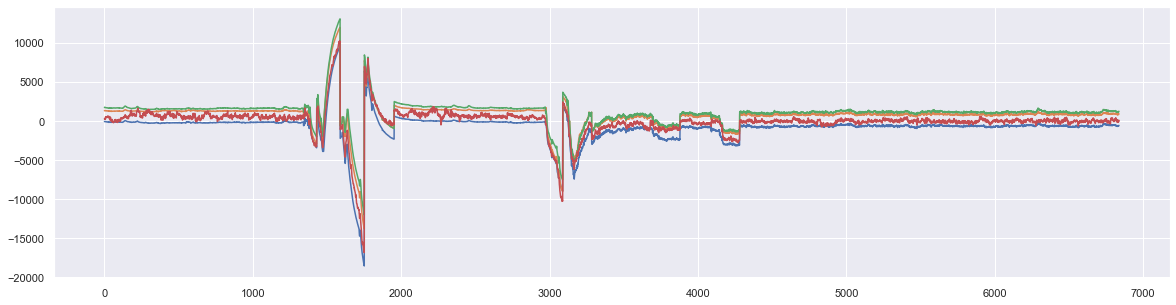

notresamp\OpenBCI-RAW-2019-07-02_10-20-09_ec.csv


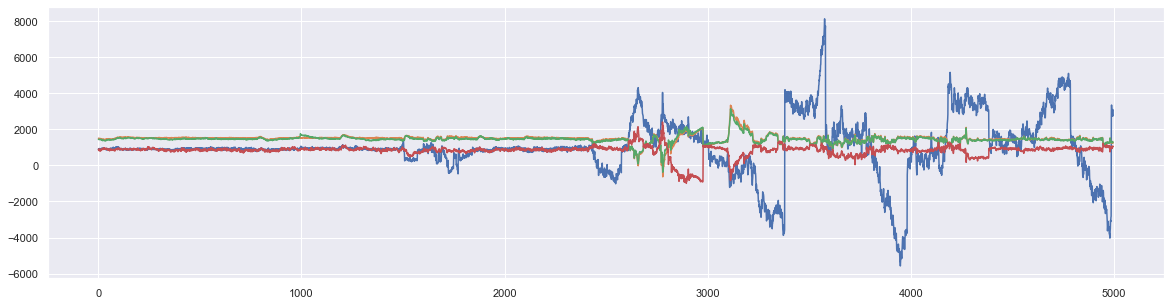

notresamp\OpenBCI-RAW-2019-07-02_10-20-09_eo.csv


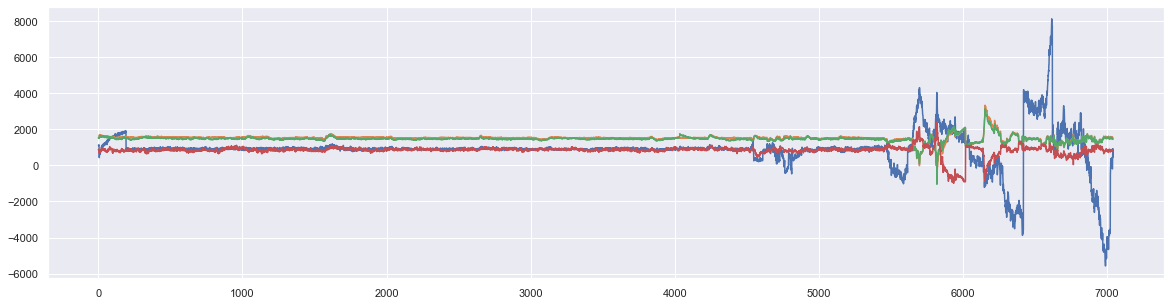

notresamp\OpenBCI-RAW-2019-07-02_11-20-05_ec.csv


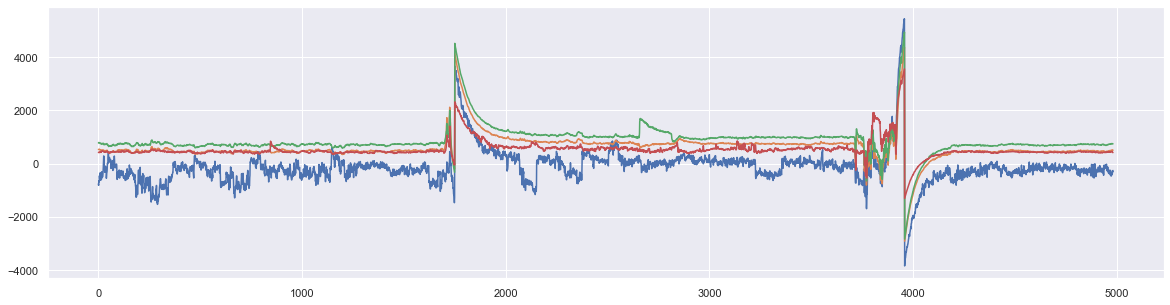

notresamp\OpenBCI-RAW-2019-07-02_11-20-05_eo.csv


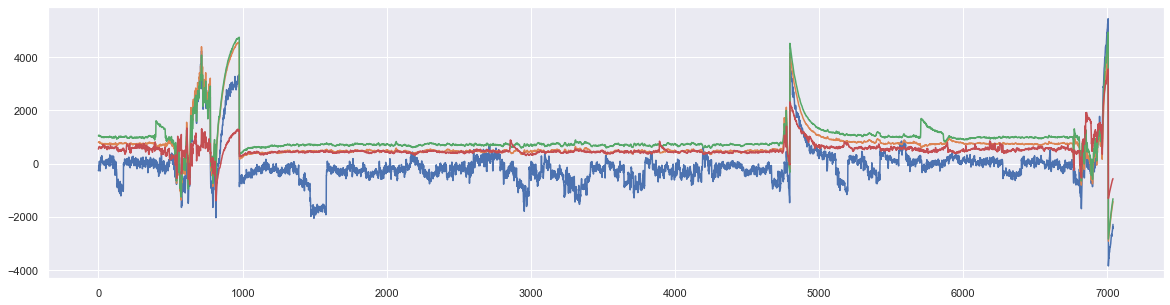

notresamp\OpenBCI-RAW-2019-07-02_11-47-52_ec.csv


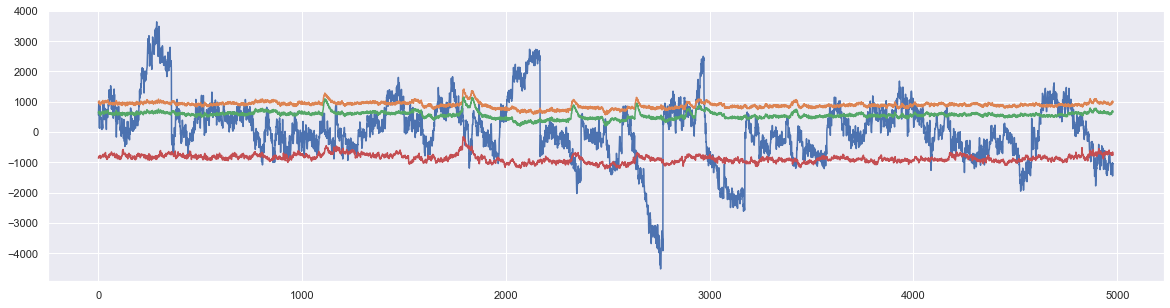

notresamp\OpenBCI-RAW-2019-07-02_11-47-52_eo.csv


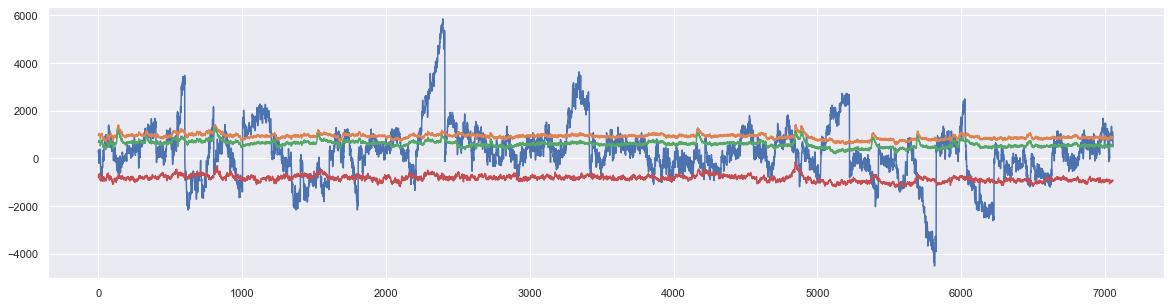

notresamp\OpenBCI-RAW-2019-07-02_16-12-07_ec.csv


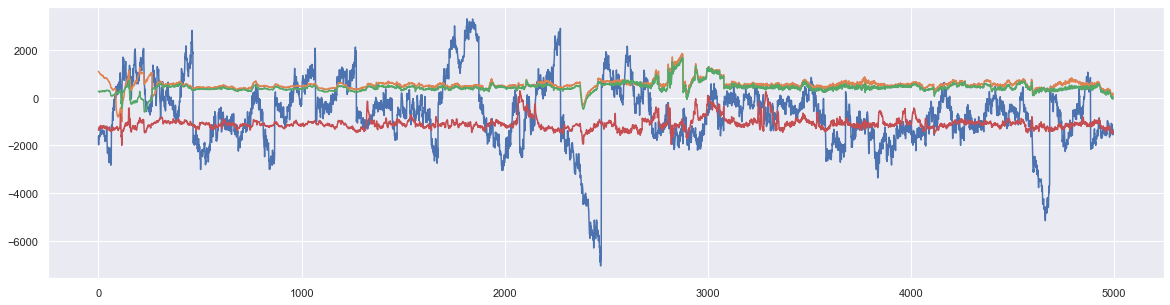

notresamp\OpenBCI-RAW-2019-07-02_16-12-07_eo.csv


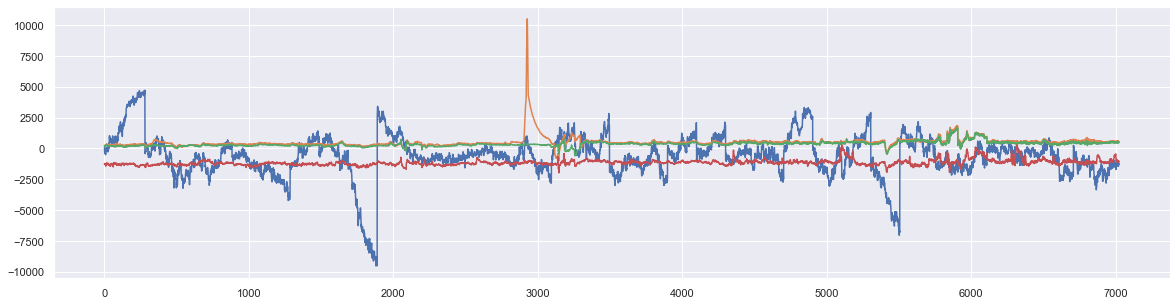

In [74]:
for f in glob.glob('notresamp\*.csv'):
    print(f)
    df = pd.read_csv(f)
    plt.figure(figsize = (20,5))
    plt.plot(df[['ch1', 'ch2', 'ch3', 'ch4']])
    plt.show()

good_epochs\OpenBCI-RAW-2019-06-20_16-06-23_ec.csv


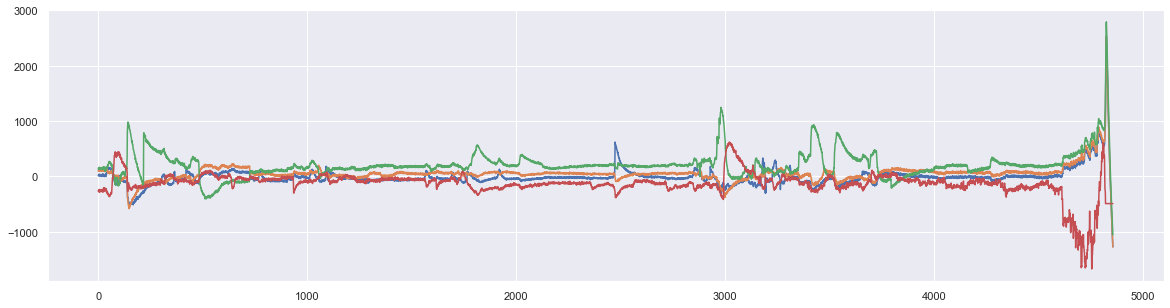

good_epochs\OpenBCI-RAW-2019-06-20_16-06-23_eo.csv


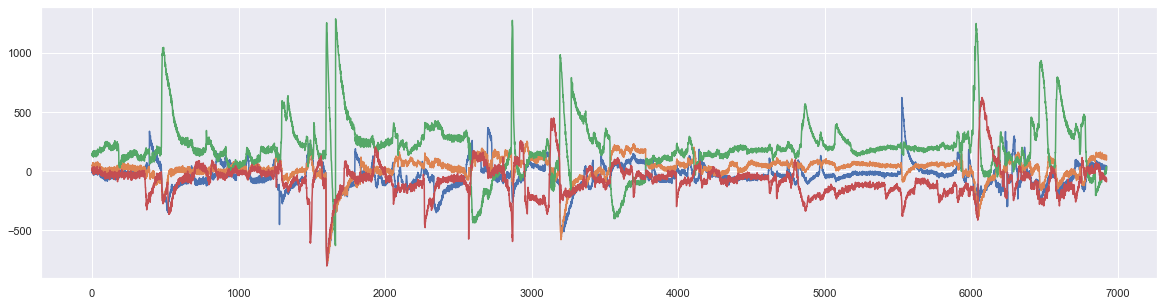

good_epochs\OpenBCI-RAW-2019-06-21_15-48-38_ec.csv


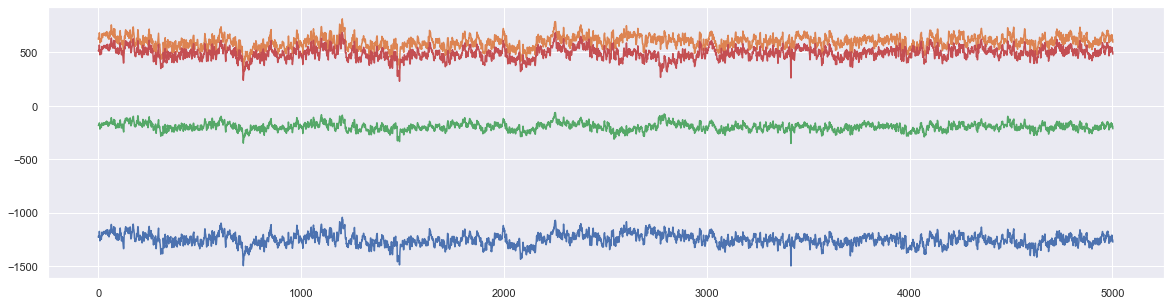

good_epochs\OpenBCI-RAW-2019-06-21_15-48-38_eo.csv


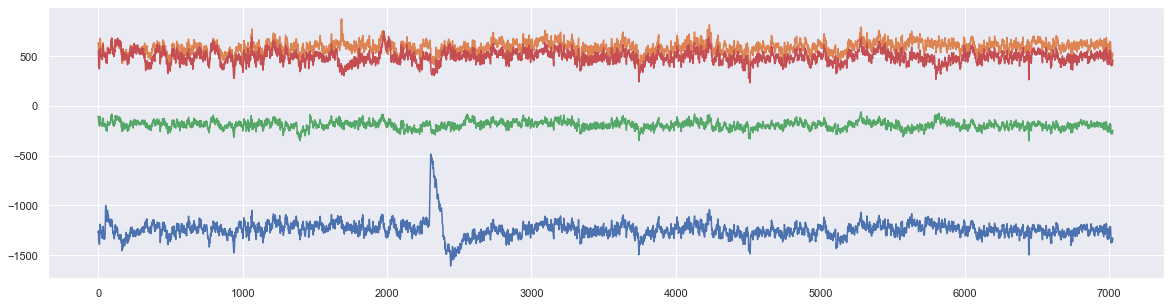

good_epochs\OpenBCI-RAW-2019-06-24_12-31-44_ec.csv


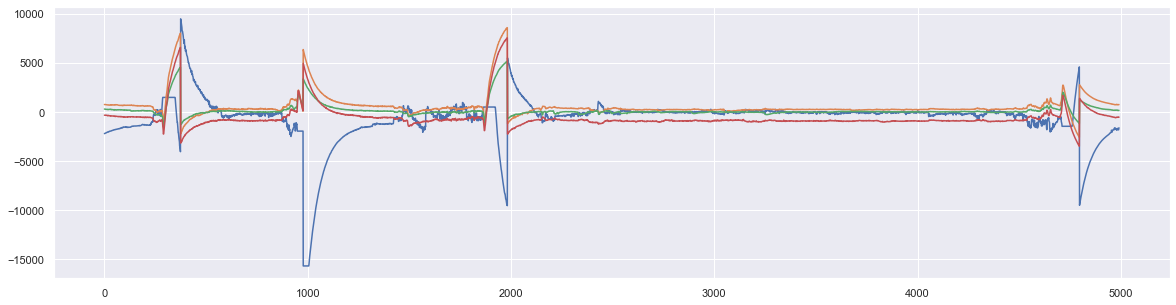

good_epochs\OpenBCI-RAW-2019-06-24_12-31-44_eo.csv


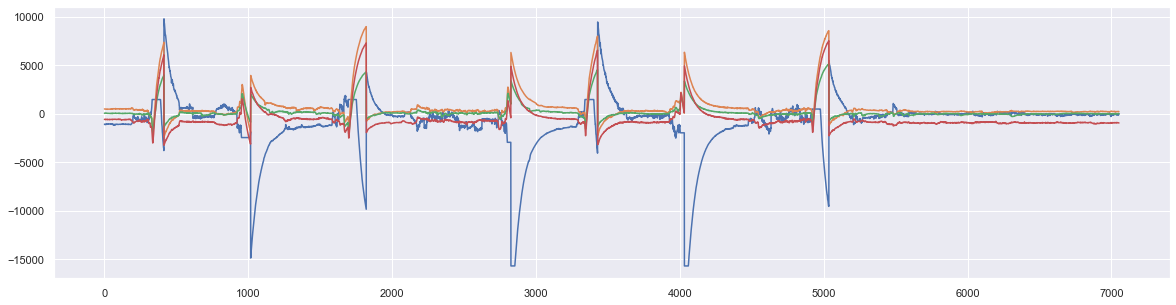

good_epochs\OpenBCI-RAW-2019-06-25_15-35-22_ec.csv


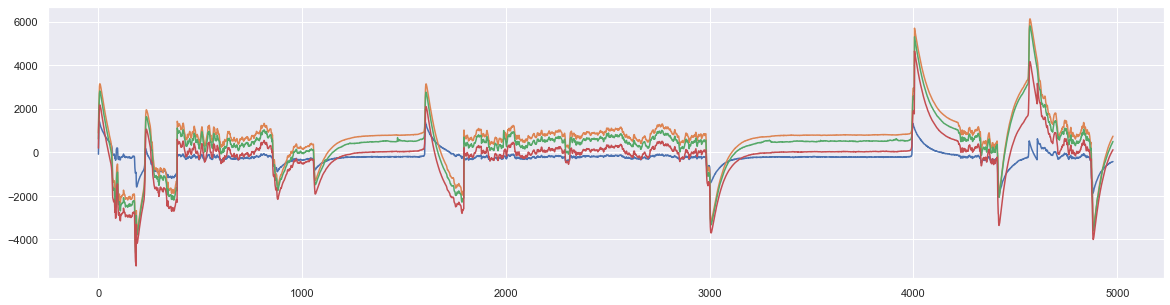

good_epochs\OpenBCI-RAW-2019-06-25_15-35-22_eo.csv


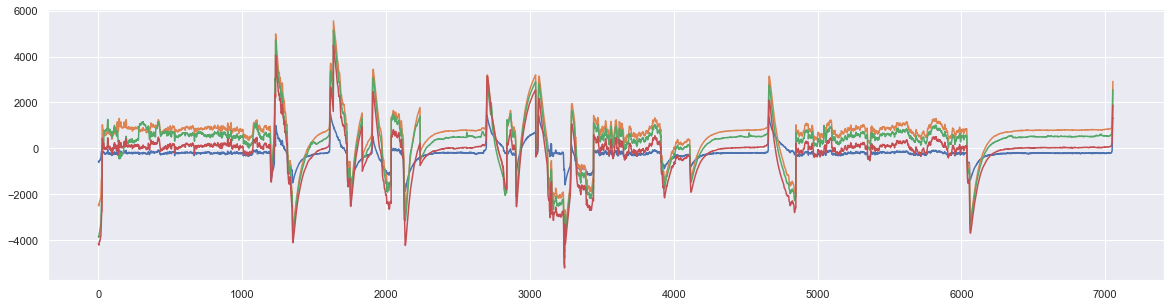

good_epochs\OpenBCI-RAW-2019-06-25_16-40-28_ec.csv


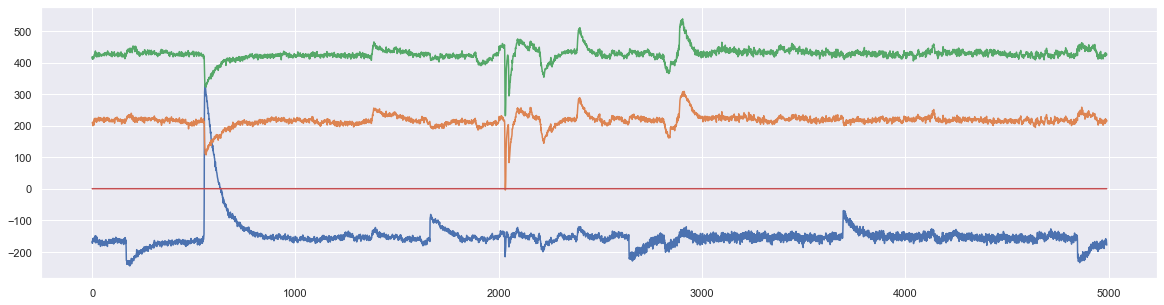

good_epochs\OpenBCI-RAW-2019-06-25_16-40-28_eo.csv


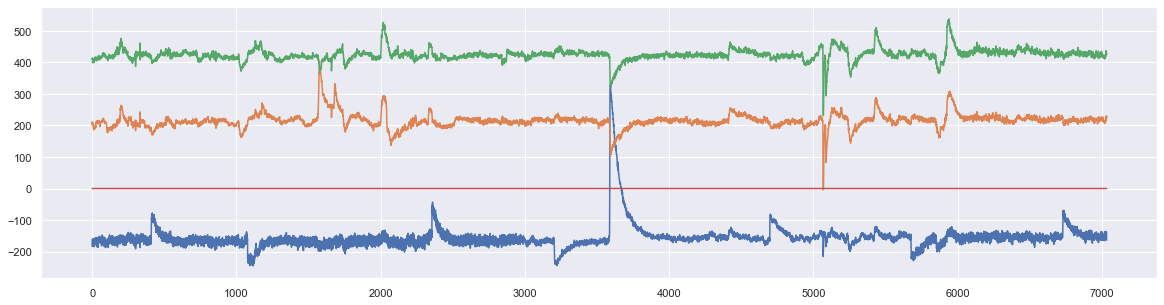

good_epochs\OpenBCI-RAW-2019-06-26_10-32-20_ec.csv


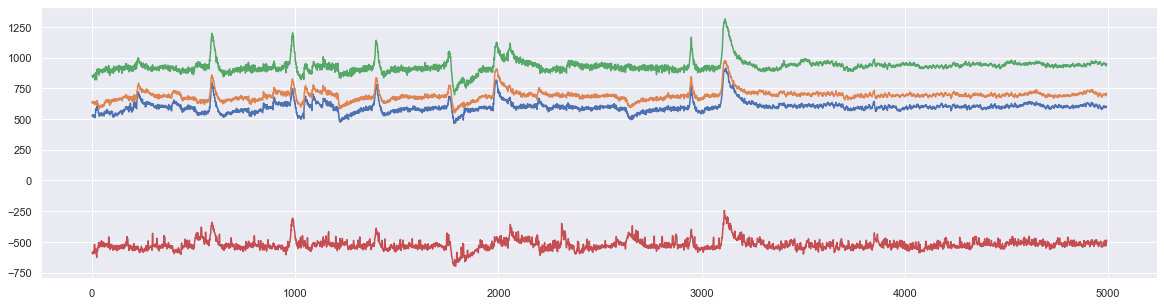

good_epochs\OpenBCI-RAW-2019-06-26_10-32-20_eo.csv


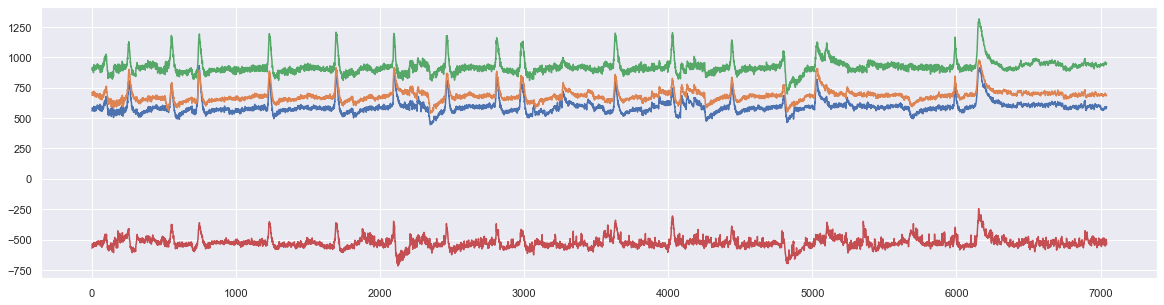

good_epochs\OpenBCI-RAW-2019-06-26_12-20-28_ec.csv


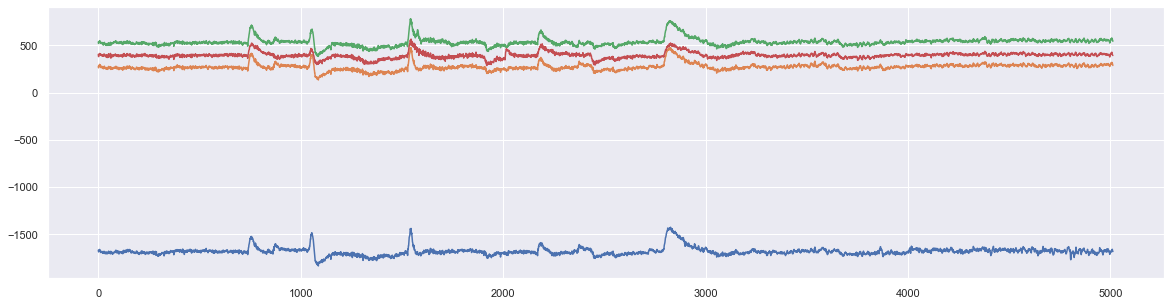

good_epochs\OpenBCI-RAW-2019-06-26_12-20-28_eo.csv


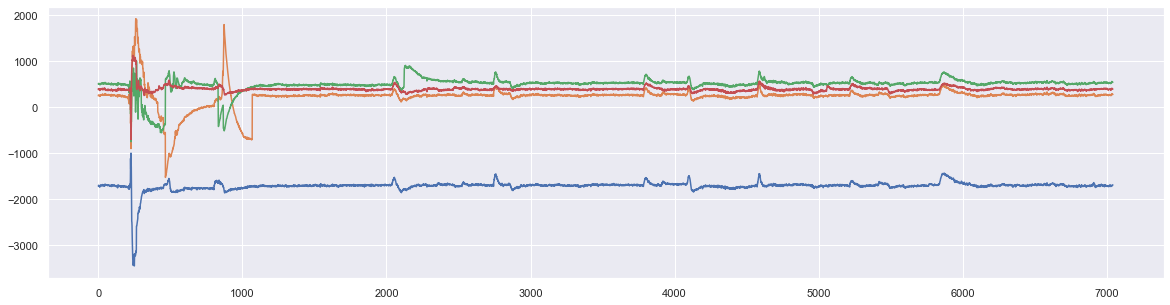

good_epochs\OpenBCI-RAW-2019-06-27_10-36-31_ec.csv


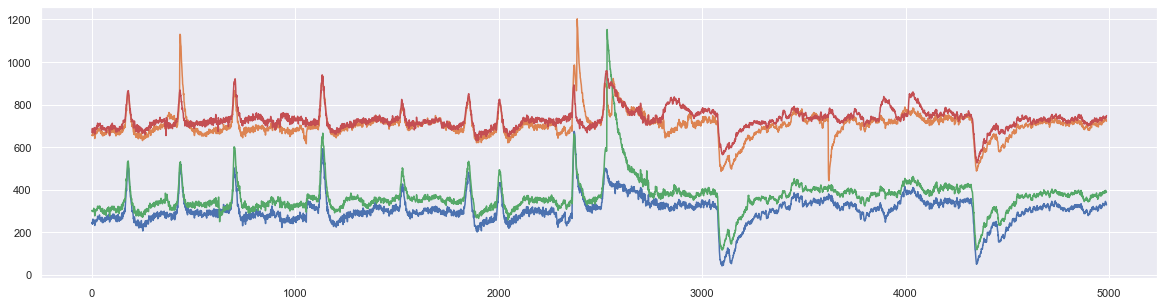

good_epochs\OpenBCI-RAW-2019-06-27_10-36-31_eo.csv


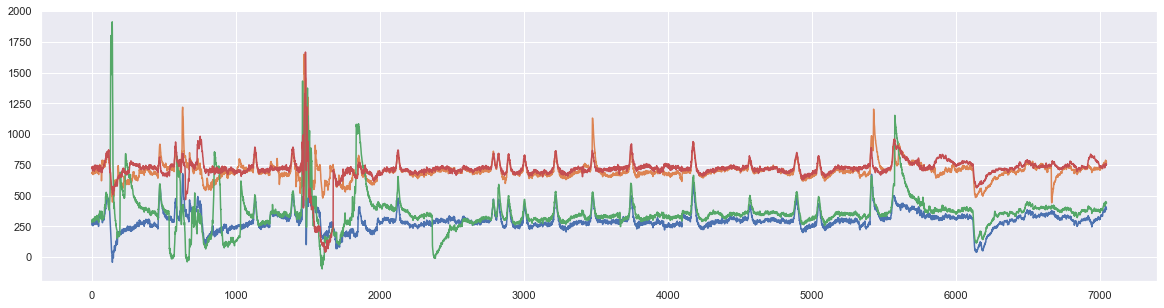

good_epochs\OpenBCI-RAW-2019-06-27_11-31-16_ec.csv


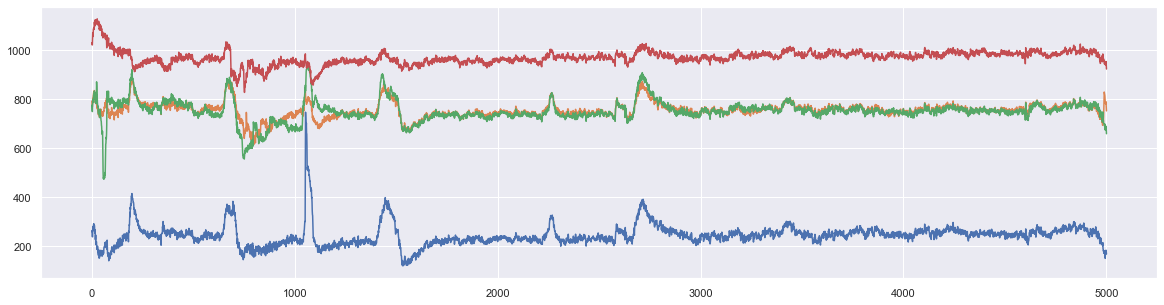

good_epochs\OpenBCI-RAW-2019-06-27_11-31-16_eo.csv


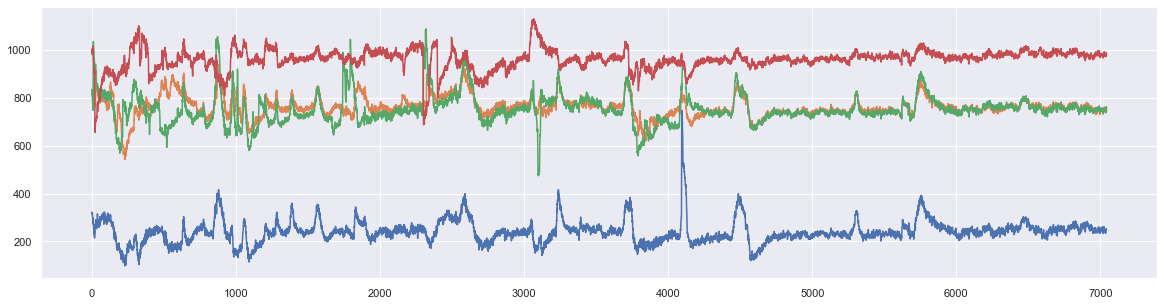

good_epochs\OpenBCI-RAW-2019-06-27_12-37-11_ec.csv


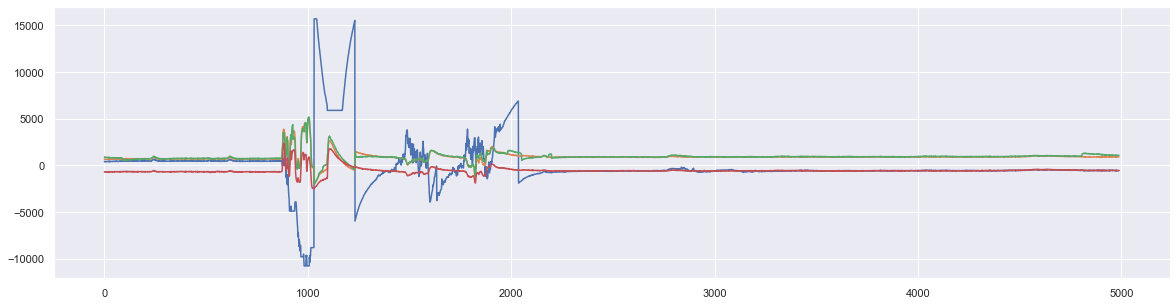

good_epochs\OpenBCI-RAW-2019-06-27_12-37-11_eo.csv


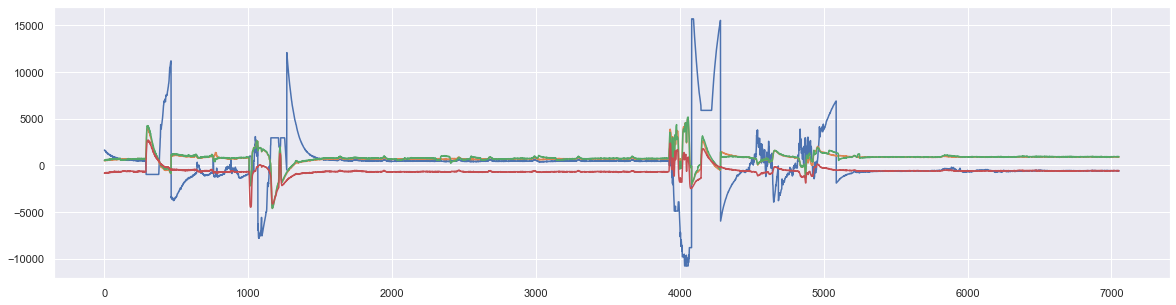

good_epochs\OpenBCI-RAW-2019-06-28_10-01-56_ec.csv


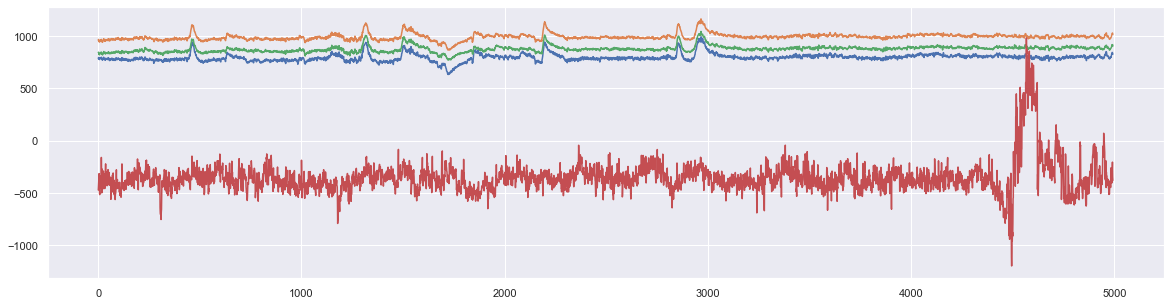

good_epochs\OpenBCI-RAW-2019-06-28_10-01-56_eo.csv


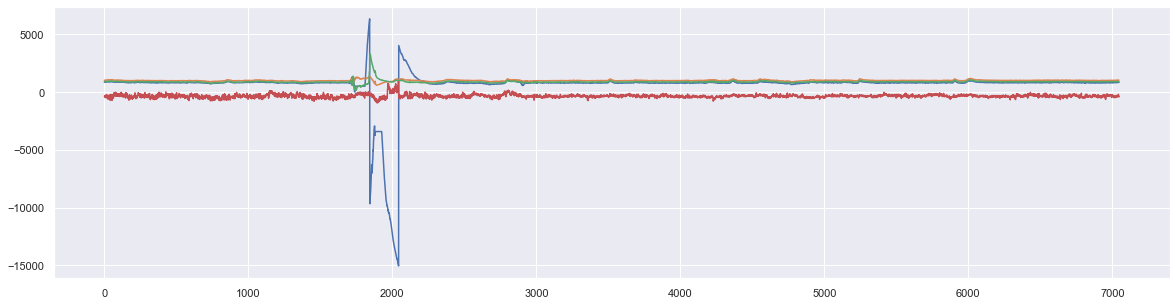

good_epochs\OpenBCI-RAW-2019-06-28_10-40-45_ec.csv


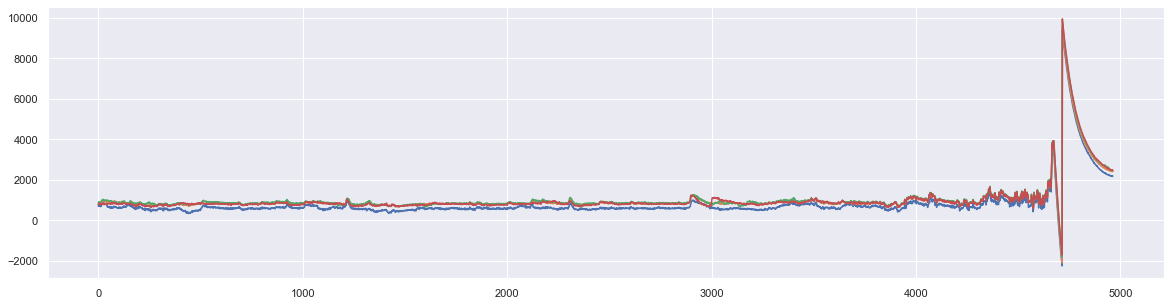

good_epochs\OpenBCI-RAW-2019-06-28_10-40-45_eo.csv


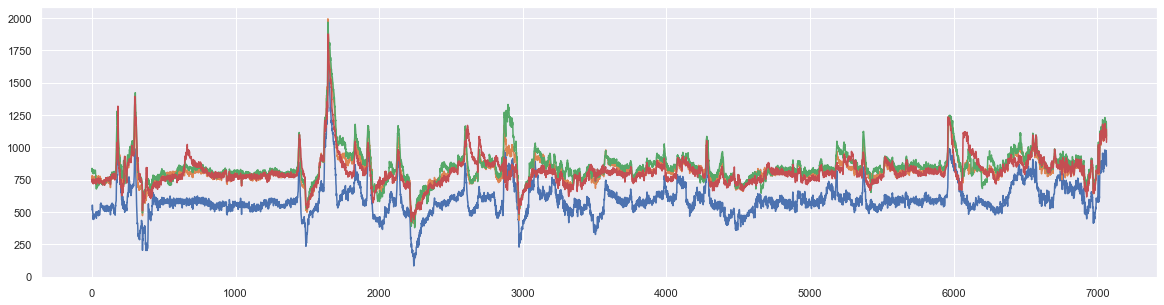

good_epochs\OpenBCI-RAW-2019-06-28_12-02-45_ec.csv


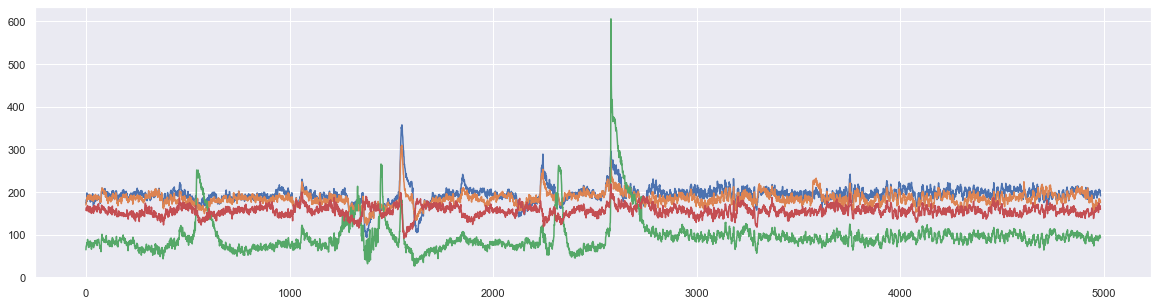

good_epochs\OpenBCI-RAW-2019-06-28_12-02-45_eo.csv


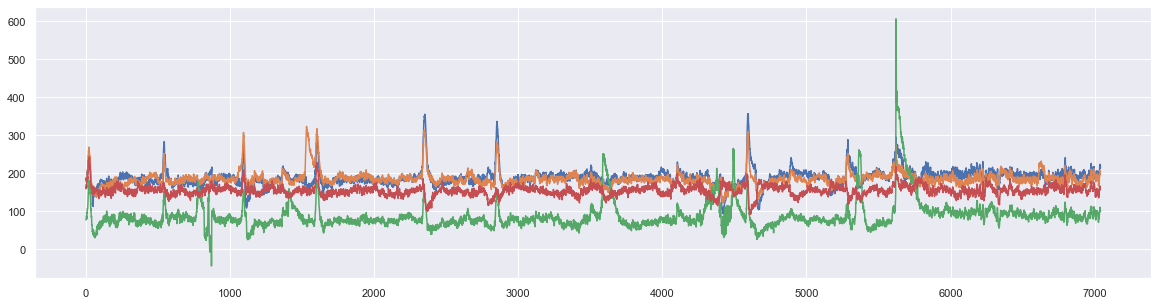

good_epochs\OpenBCI-RAW-2019-07-01_10-19-46_eo.csv


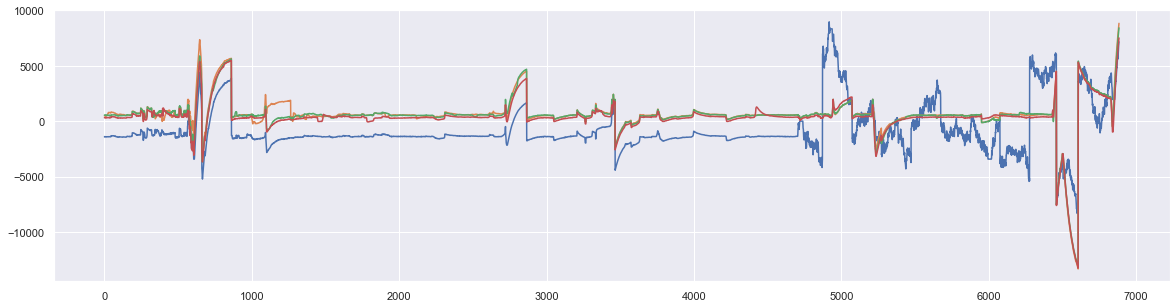

good_epochs\OpenBCI-RAW-2019-07-01_12-47-43_ec.csv


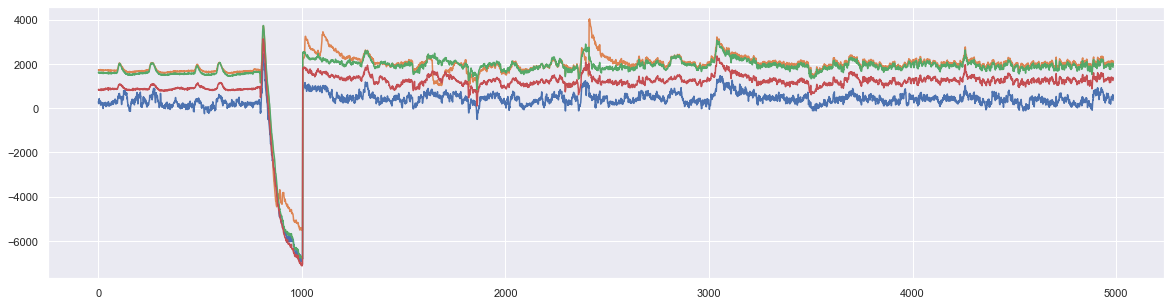

good_epochs\OpenBCI-RAW-2019-07-01_12-47-43_eo.csv


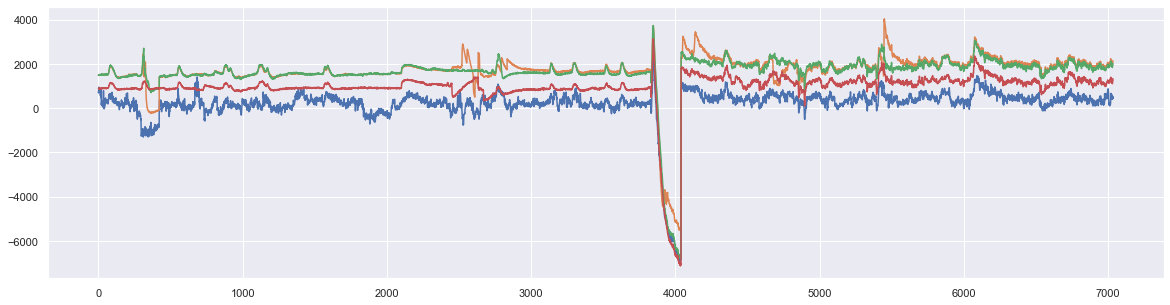

good_epochs\OpenBCI-RAW-2019-07-01_15-48-56_ec.csv


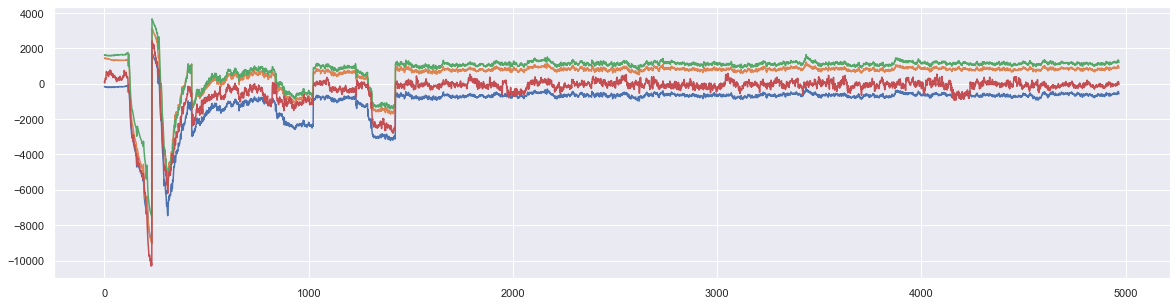

good_epochs\OpenBCI-RAW-2019-07-01_15-48-56_eo.csv


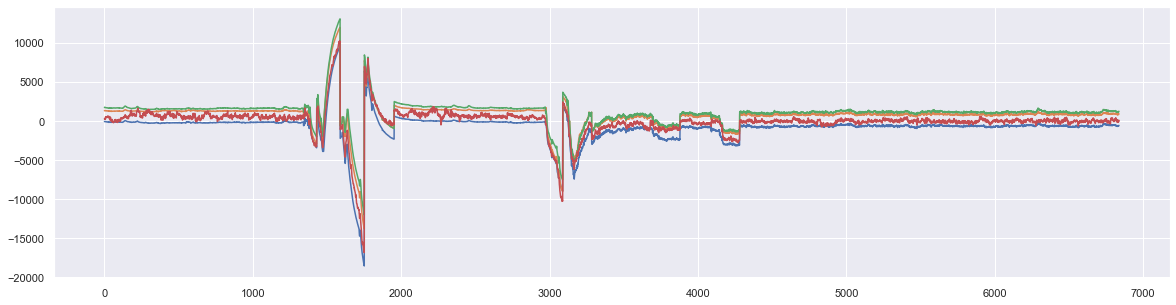

good_epochs\OpenBCI-RAW-2019-07-02_10-20-09_ec.csv


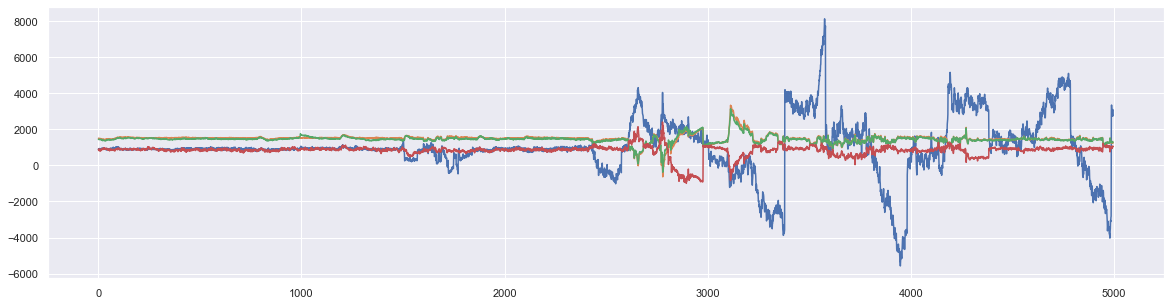

good_epochs\OpenBCI-RAW-2019-07-02_10-20-09_eo.csv


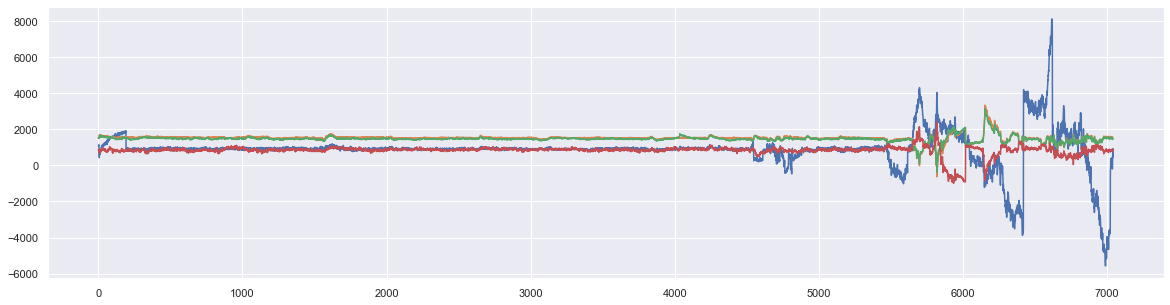

good_epochs\OpenBCI-RAW-2019-07-02_11-20-05_ec.csv


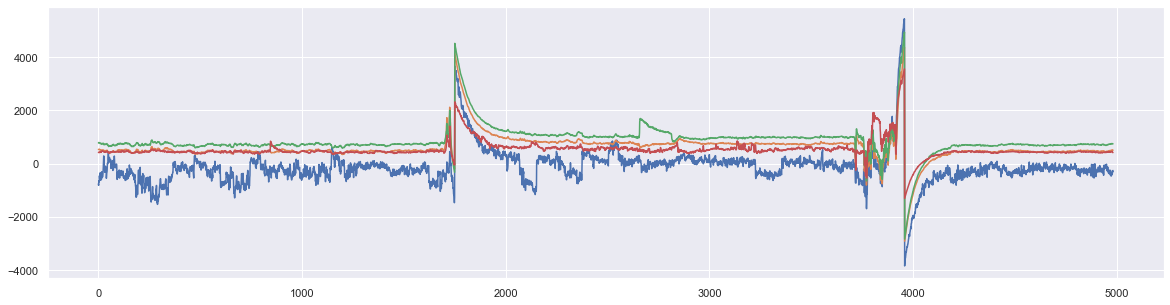

good_epochs\OpenBCI-RAW-2019-07-02_11-20-05_eo.csv


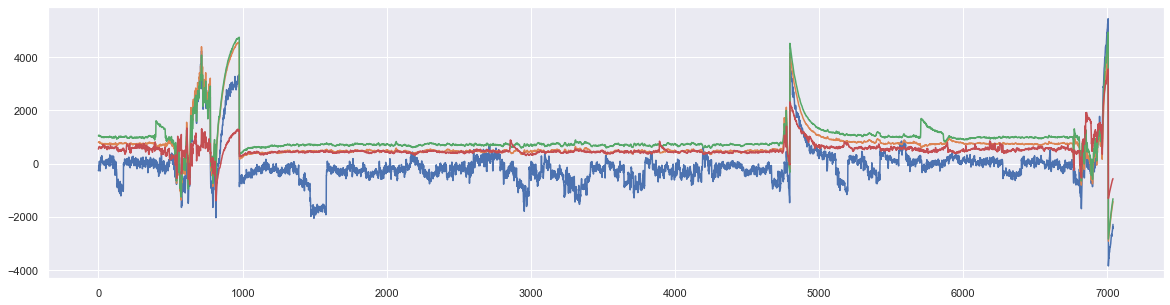

good_epochs\OpenBCI-RAW-2019-07-02_11-47-52_ec.csv


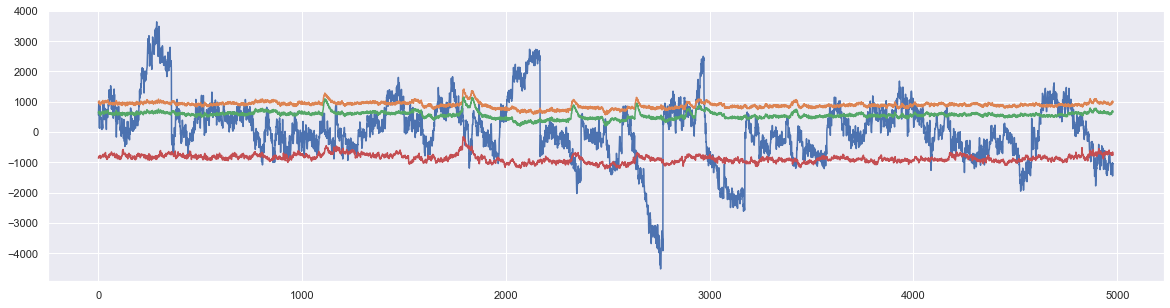

good_epochs\OpenBCI-RAW-2019-07-02_11-47-52_eo.csv


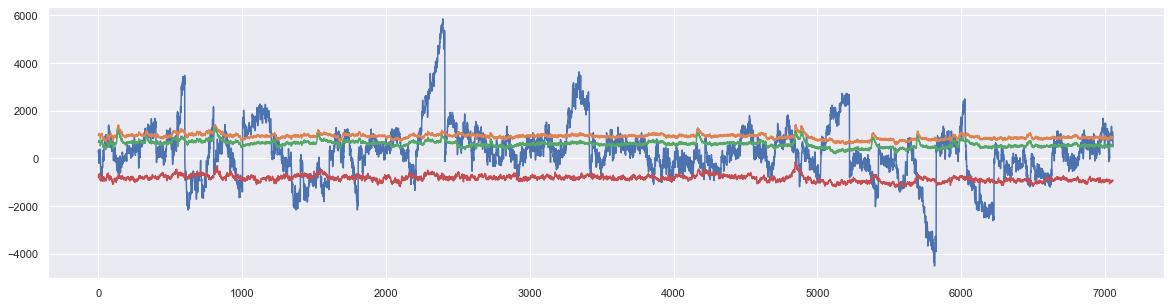

good_epochs\OpenBCI-RAW-2019-07-02_16-12-07_ec.csv


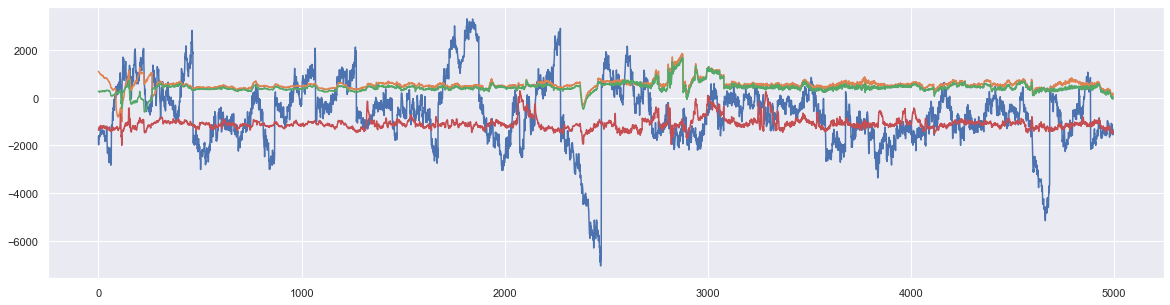

good_epochs\OpenBCI-RAW-2019-07-02_16-12-07_eo.csv


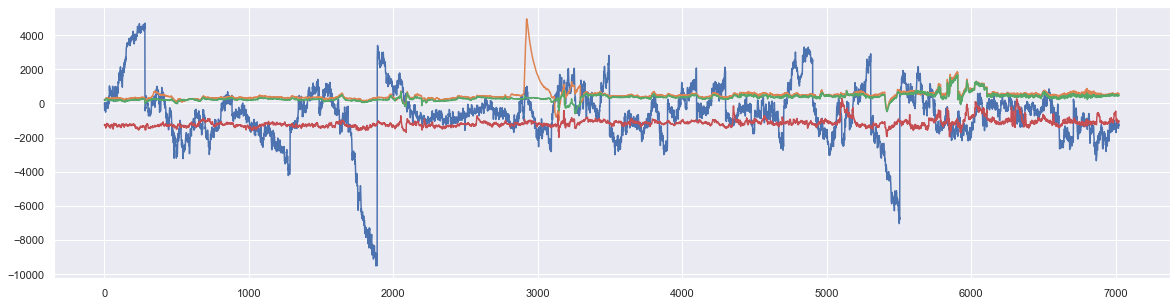

In [72]:
for f in glob.glob('good_epochs\*.csv'):
    print(f)
    df = pd.read_csv(f)
    plt.figure(figsize = (20,5))
    plt.plot(df[['ch1', 'ch2', 'ch3', 'ch4']])
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(693596.5437693981, 693596.5439984375)

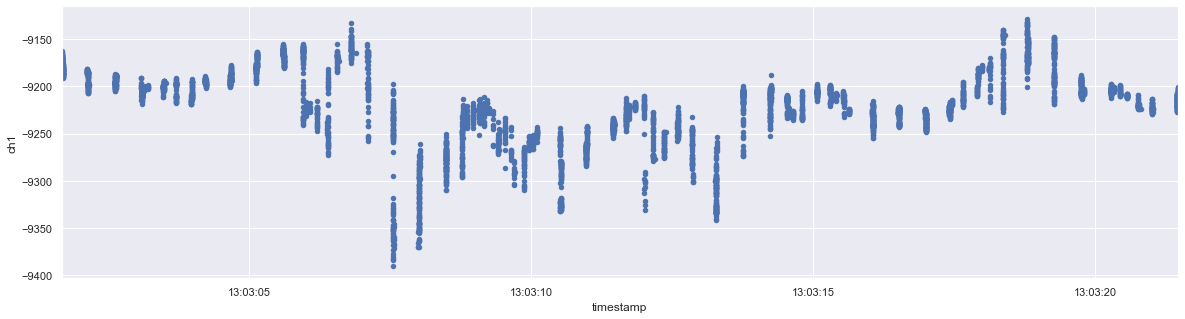

In [34]:
fig = plt.figure(figsize =(20,5))

ax = plt.subplot(111)
df_file.plot(x='timestamp',y='ch1',ax=ax, kind='scatter')

ax.set_xlim(df_file['timestamp'].iloc[0], df_file['timestamp'].iloc[-1])

#ax = plt.scatter(df_file['timestamp'], df_file['ch1'], ax = ax)
#ax.set_xlim(df_file['timestamp'].iloc[0], df_file['timestamp'].iloc[-1])


In [14]:
period = 10
rate = str(period)+'ms'
# Resample with mean
resamp = df_rej.set_index('timestamp').resample(rate).mean()
# Interpolate missing values
#resamp = resamp.interpolate(method = spline)
# Drop row if data column is nan
resamp = resamp.dropna(subset = ['ch1'])


In [15]:
len(resamp)

184

In [ ]:
plt.scatter(df_file['timestamp'], df_file['ch1'])


In [ ]:
plt.plot(df_rej['ch1'])
len(df_rej)

In [ ]:
plt.plot(resamp['ch1'])
len(resamp)

In [ ]:
4910/2.5

In [ ]:
period = 10 # resampling period in ms 100HZ
channels = ['ch1', 'ch2', 'ch3']

for file in tqdm(files[0:1]):
    #print(file)
    df_file = pd.read_csv(file)
    # Convert timestamp to datetime format with Pandas
    df_file['timestamp'] = pd.to_datetime(df_file['timestamp'], format = '%Y-%m-%d %H:%M:%S.%f', errors = 'coerce')
    df_rej = reject(df_file, threshold = 5, window = 2000)
    # Period is in ms
    resamp = resample(df_file,df_rej, 10)
    
    #you should create the folder named resamp
    newfile = 'resamp/'+file[11:]
    #resamp.to_csv(newfile)                
    #print(newfile, 'saved')
        
    